In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ldds.vector_fields import Duffing1D, DoubleGyre
from vector_fields import DavisSkodje
import matplotlib.pyplot as plt
from grid import *
from solves import *
from plots import *

In [3]:
N = 200
grid = Duffing_grid(N)
[(x_min, x_max, Nx), (y_min, y_max, Ny)] = grid
t_n = 12
trajs, sol = integrate_ivp(Duffing1D, grid, t_n, max_step=0.01, return_sol=True)
time = sol.t
m = len(time)  // 2
dt = time[m]- time[m-1]
duff_tse = mean_tse(trajs, dt)


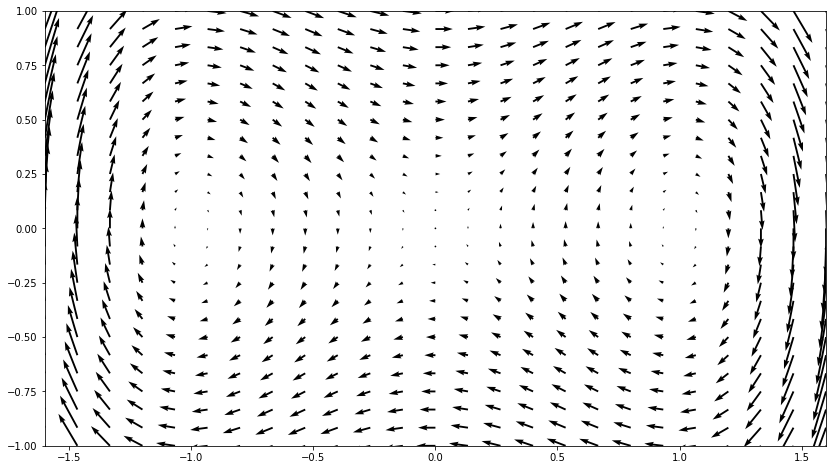

In [4]:
v_grid = [(x_min, x_max, 25), (y_min, y_max, 25)]
plot_vector_field(Duffing1D , v_grid)

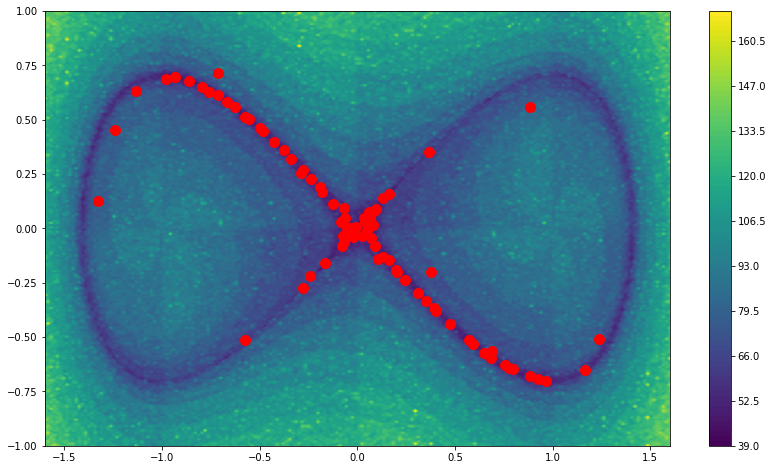

In [5]:
pts = get_point_array_from_grid(grid)
neurons = learn_lcs(pts, duff_tse, 80, eta=.2, epochs=2)
plot_scalar_field(grid, duff_tse, show=False)
for (x,y) in neurons:
    plt.scatter(x[0], x[1], marker='o', s=100, c='r')

plt.show()


In [6]:
N = 200
grid = DavisSkodje_grid(N)
[(x_min, x_max, Nx), (y_min, y_max, Ny)] = grid
t_n = 12
trajs, sol = integrate_ivp(DavisSkodje, grid, t_n, max_step=0.01, return_sol=True)
time = sol.t
m = len(time)  // 2
dt = time[m]- time[m-1]

ds_tse = mean_tse(trajs, dt)


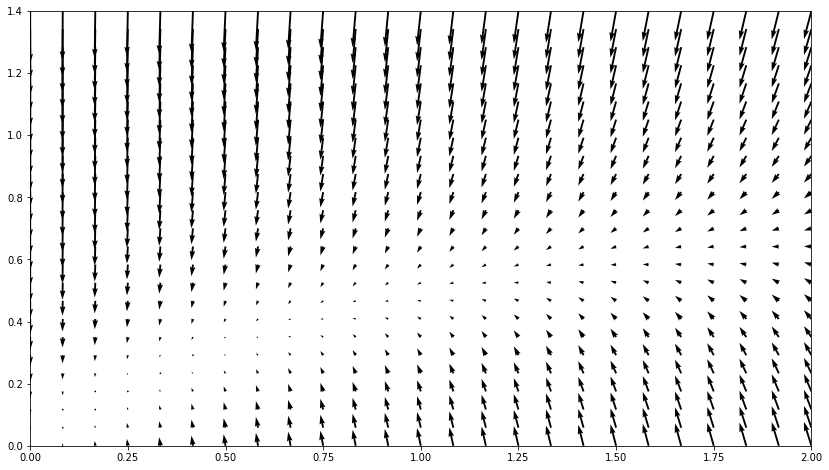

In [7]:
v_grid = [(x_min, x_max, 25), (y_min, y_max, 25)]
plot_vector_field(DavisSkodje , v_grid)

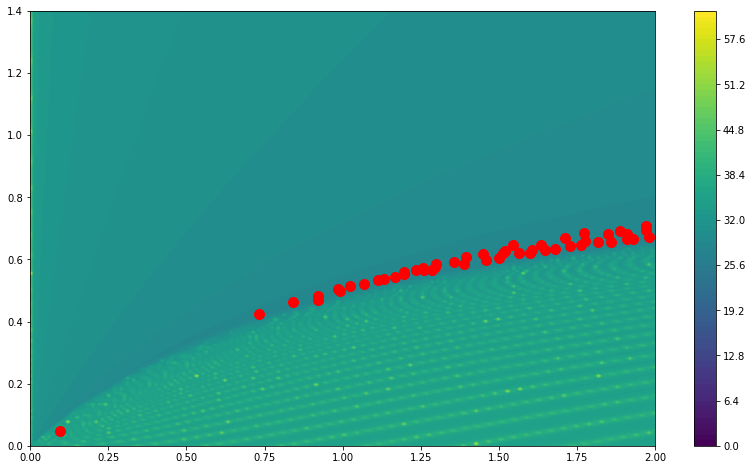

In [8]:
pts = get_point_array_from_grid(grid)
neurons = learn_lcs(pts, ds_tse, 50, eta=0.15, epochs=1)
plot_scalar_field(grid, ds_tse, show=False)
for (x,y) in neurons:
    plt.scatter(x[0], x[1], marker='o', s=100, c='r')

plt.show()
